In [1]:
!pip3.11 install yfinance


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd

def fetch_sustainability_data(symbol):
    """
    Fetch the sustainability data for a given company symbol using yfinance.
    Returns a DataFrame if available, otherwise returns None.
    """
    ticker = yf.Ticker(symbol)
    sustainability = ticker.sustainability  # Returns a DataFrame or None
    if sustainability is not None:
        sustainability = sustainability.reset_index()  # Convert index to a column
        sustainability.rename(columns={"index": "Metric", "Value": "Score"}, inplace=True)
        sustainability["Symbol"] = symbol  # Add a column for the company symbol
        return sustainability
    else:
        print(f"Sustainability data not available for {symbol}")
        return None

# List of company symbols
companies = ["TSLA", "AAPL", "GOOGL", "MSFT", "AMZN"]

# Fetch sustainability data for each company
sustainability_data = []
for symbol in companies:
    data = fetch_sustainability_data(symbol)
    if data is not None:
        sustainability_data.append(data)

# Combine data for all companies into one DataFrame
if sustainability_data:
    df_sustainability = pd.concat(sustainability_data, ignore_index=True)
    print("Fetched sustainability data:")
    print(df_sustainability.head())
    # Save the combined data to CSV for later use
    df_sustainability.to_csv("../data/yahoo_sustainability_data.csv", index=False)
else:
    print("No sustainability data fetched.")


Fetched sustainability data:
             Metric esgScores Symbol
0            maxAge     86400   TSLA
1          totalEsg     24.73   TSLA
2  environmentScore       3.2   TSLA
3       socialScore     14.13   TSLA
4   governanceScore       7.4   TSLA


Available metrics: ['maxAge' 'totalEsg' 'environmentScore' 'socialScore' 'governanceScore'
 'ratingYear' 'ratingMonth' 'highestControversy' 'peerCount'
 'esgPerformance' 'peerGroup' 'relatedControversy'
 'peerEsgScorePerformance' 'peerGovernancePerformance'
 'peerSocialPerformance' 'peerEnvironmentPerformance'
 'peerHighestControversyPerformance' 'percentile' 'environmentPercentile'
 'socialPercentile' 'governancePercentile' 'adult' 'alcoholic'
 'animalTesting' 'catholic' 'controversialWeapons' 'smallArms'
 'furLeather' 'gambling' 'gmo' 'militaryContract' 'nuclear' 'pesticides'
 'palmOil' 'coal' 'tobacco']


/var/folders/87/rpnrl1591wdfnzf1y554kdt00000gn/T/ipykernel_1534/712870639.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_data["Score"] = pd.to_numeric(env_data["esgScores"], errors="coerce")


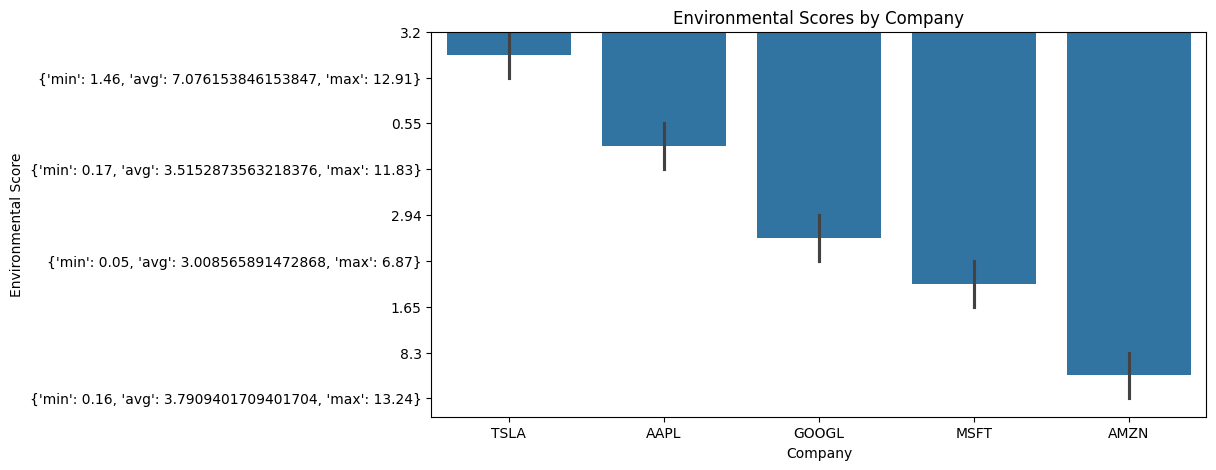

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved sustainability data (if you haven't already in this session)
df_sust = pd.read_csv("../data/yahoo_sustainability_data.csv")

# Inspect available metrics
print("Available metrics:", df_sust["Metric"].unique())

# Filter data for the 'environmentScore' metric (the exact name may vary)
env_data = df_sust[df_sust["Metric"].str.contains("environment", case=False, na=False)]

if not env_data.empty:
    # Ensure the Score column is numeric
    env_data["Score"] = pd.to_numeric(env_data["esgScores"], errors="coerce")
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Symbol", y="esgScores", data=env_data)
    plt.title("Environmental Scores by Company")
    plt.xlabel("Company")
    plt.ylabel("Environmental Score")
    plt.show()
else:
    print("No environmental score data available for visualization.")
